In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (15,5)   #change size of graph

In [3]:
df = pd.read_csv("MBB Historical Data.csv")

In [4]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Data Preparation

In [5]:
df.set_index(pd.to_datetime(df.Date), inplace = True)    
df.sort_index(ascending = True, inplace = True)     #sort data
df.drop(columns = 'Date', inplace = True)
df

Price      Open      High       Low    Vol. Change %
Date                                                               
2021-01-04  14,648.6  14,312.2  14,893.3  14,128.8  69.27M    4.13%
2021-01-05  15,382.6  14,771.0  15,382.6  14,648.6  55.66M    5.01%
2021-01-06  15,617.3  15,740.7  16,049.4  15,432.1  35.74M    1.53%
2021-01-07  15,987.7  15,740.7  16,018.5  15,586.4  30.65M    2.37%
2021-01-08  16,419.8  16,172.8  16,882.7  16,049.4  41.90M    2.70%
...              ...       ...       ...       ...     ...      ...
2024-04-04  23,800.0  24,200.0  25,850.0  23,800.0  27.79M   -1.65%
2024-04-05  23,350.0  23,850.0  25,450.0  23,300.0  25.38M   -1.89%
2024-04-08  23,500.0  23,350.0  24,950.0  23,150.0  24.71M    0.64%
2024-04-09  24,000.0  23,500.0  25,100.0  23,400.0  15.73M    2.13%
2024-04-10  23,800.0  25,650.0  25,650.0  23,800.0  21.08M   -0.83%

[815 rows x 6 columns]

In [6]:
column_to_format = ['Price', 'Open', 'High', 'Low']
for column in column_to_format:
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype('float64')

In [7]:
df

Price     Open     High      Low    Vol. Change %
Date                                                           
2021-01-04  14648.6  14312.2  14893.3  14128.8  69.27M    4.13%
2021-01-05  15382.6  14771.0  15382.6  14648.6  55.66M    5.01%
2021-01-06  15617.3  15740.7  16049.4  15432.1  35.74M    1.53%
2021-01-07  15987.7  15740.7  16018.5  15586.4  30.65M    2.37%
2021-01-08  16419.8  16172.8  16882.7  16049.4  41.90M    2.70%
...             ...      ...      ...      ...     ...      ...
2024-04-04  23800.0  24200.0  25850.0  23800.0  27.79M   -1.65%
2024-04-05  23350.0  23850.0  25450.0  23300.0  25.38M   -1.89%
2024-04-08  23500.0  23350.0  24950.0  23150.0  24.71M    0.64%
2024-04-09  24000.0  23500.0  25100.0  23400.0  15.73M    2.13%
2024-04-10  23800.0  25650.0  25650.0  23800.0  21.08M   -0.83%

[815 rows x 6 columns]

In [8]:
df['Vol.'].str.contains('K').sum()

0

There is no trading volume with unit K, we just need to remove letter 'M' to convert column Vol into float

In [9]:
df['Vol'] = df['Vol.'].str.replace('M','')
df.drop(columns = 'Vol.', inplace = True)
df['Vol'] = df['Vol'].astype('float')

In [10]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %     object
Vol         float64
dtype: object

In [11]:
Moving_Average_Day = [50, 100, 200]
for Moving_Average in Moving_Average_Day:
    column_name = f'Moving Average for {Moving_Average} days'
    df[column_name] = df["Price"].rolling(Moving_Average).mean()
df

Price     Open     High      Low Change %    Vol  \
Date                                                             
2021-01-04  14648.6  14312.2  14893.3  14128.8    4.13%  69.27   
2021-01-05  15382.6  14771.0  15382.6  14648.6    5.01%  55.66   
2021-01-06  15617.3  15740.7  16049.4  15432.1    1.53%  35.74   
2021-01-07  15987.7  15740.7  16018.5  15586.4    2.37%  30.65   
2021-01-08  16419.8  16172.8  16882.7  16049.4    2.70%  41.90   
...             ...      ...      ...      ...      ...    ...   
2024-04-04  23800.0  24200.0  25850.0  23800.0   -1.65%  27.79   
2024-04-05  23350.0  23850.0  25450.0  23300.0   -1.89%  25.38   
2024-04-08  23500.0  23350.0  24950.0  23150.0    0.64%  24.71   
2024-04-09  24000.0  23500.0  25100.0  23400.0    2.13%  15.73   
2024-04-10  23800.0  25650.0  25650.0  23800.0   -0.83%  21.08   

            Moving Average for 50 days  Moving Average for 100 days  \
Date                                                                  
2021-01-04                         NaN                          NaN   
2021-01-05                         NaN                          NaN   
2021-01-06                         NaN                          NaN   
2021-01-07                         NaN                          NaN   
2021-01-08                         NaN                          NaN   
...                                ...                          ...   
2024-04-04                     23662.0                      21236.5   
2024-04-05                     23688.0                      21286.5   
2024-04-08                     23716.0                      21341.5   
2024-04-09                     23757.0                      21400.5   
2024-04-10                     23795.0                      21454.0   

            Moving Average for 200 days  
Date                                     
2021-01-04                          NaN  
2021-01-05                          NaN  
2021-01-06                          NaN  
2021-01-07                          NaN  
2021-01-08                          NaN  
...                                 ...  
2024-04-04                    20005.239  
2024-04-05                    20023.739  
2024-04-08                    20041.989  
2024-04-09                    20062.489  
2024-04-10                    20080.489  

[815 rows x 9 columns]

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size = 0.97, shuffle = False)

In [13]:
train_data

Price     Open     High      Low Change %    Vol  \
Date                                                             
2021-01-04  14648.6  14312.2  14893.3  14128.8    4.13%  69.27   
2021-01-05  15382.6  14771.0  15382.6  14648.6    5.01%  55.66   
2021-01-06  15617.3  15740.7  16049.4  15432.1    1.53%  35.74   
2021-01-07  15987.7  15740.7  16018.5  15586.4    2.37%  30.65   
2021-01-08  16419.8  16172.8  16882.7  16049.4    2.70%  41.90   
...             ...      ...      ...      ...      ...    ...   
2024-02-29  24150.0  24500.0  24550.0  23950.0   -1.02%  24.03   
2024-03-01  24000.0  24100.0  24150.0  23800.0   -0.62%  20.47   
2024-03-04  24200.0  24100.0  24450.0  23750.0    0.83%  31.95   
2024-03-05  24600.0  24200.0  24650.0  24100.0    1.65%  22.77   
2024-03-06  24650.0  24600.0  25150.0  24500.0    0.20%  22.28   

            Moving Average for 50 days  Moving Average for 100 days  \
Date                                                                  
2021-01-04                         NaN                          NaN   
2021-01-05                         NaN                          NaN   
2021-01-06                         NaN                          NaN   
2021-01-07                         NaN                          NaN   
2021-01-08                         NaN                          NaN   
...                                ...                          ...   
2024-02-29                     21284.0                      19628.0   
2024-03-01                     21403.0                      19687.5   
2024-03-04                     21526.0                      19748.0   
2024-03-05                     21658.0                      19811.0   
2024-03-06                     21788.0                      19873.0   

            Moving Average for 200 days  
Date                                     
2021-01-04                          NaN  
2021-01-05                          NaN  
2021-01-06                          NaN  
2021-01-07                          NaN  
2021-01-08                          NaN  
...                                 ...  
2024-02-29                    19377.739  
2024-03-01                    19403.739  
2024-03-04                    19432.489  
2024-03-05                    19462.489  
2024-03-06                    19492.489  

[790 rows x 9 columns]

## Technical Analysis

In [14]:
train_data.dtypes

Price                          float64
Open                           float64
High                           float64
Low                            float64
Change %                        object
Vol                            float64
Moving Average for 50 days     float64
Moving Average for 100 days    float64
Moving Average for 200 days    float64
dtype: object

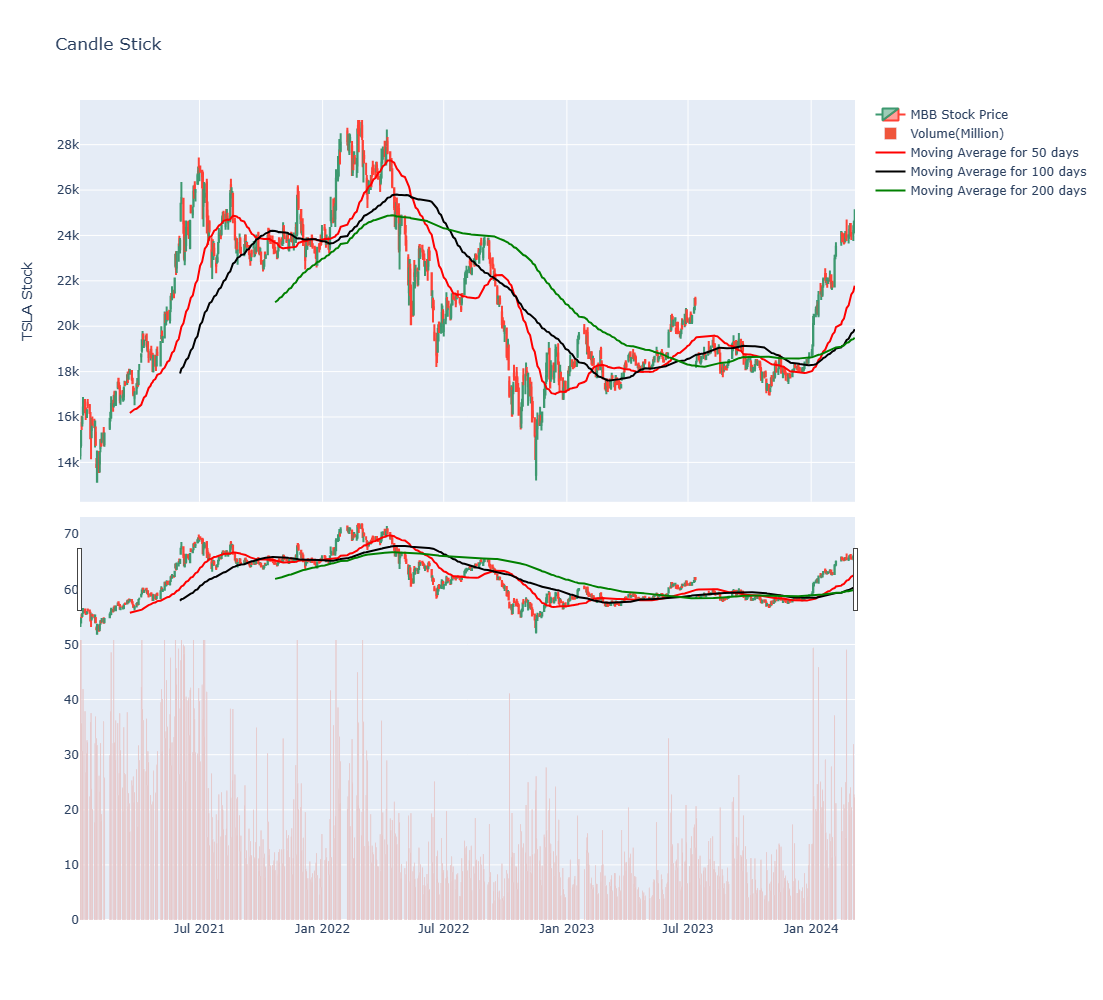

In [15]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as ms
fig = ms.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Candlestick(x=train_data.index,
                             open=train_data.Open, 
                             high=train_data.High,
                             low=train_data.Low,
                             close=train_data.Price, name='MBB Stock Price'), row=1, col=1)

fig.add_trace(go.Bar(x=train_data.index, y=train_data.Vol, name='Volume(Million)'), row=2, col=1)

#adding moving average
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Moving Average for 50 days'], line=dict(color='red', width=2), name='Moving Average for 50 days'), row=1, col=1)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Moving Average for 100 days'], line=dict(color='black', width=2), name='Moving Average for 100 days'), row=1, col=1)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Moving Average for 200 days'], line=dict(color='green', width=2), name='Moving Average for 200 days'), row=1, col=1)

fig.update_layout(title='Candle Stick', yaxis_title='TSLA Stock', height=1000, width=1100)

fig.show()

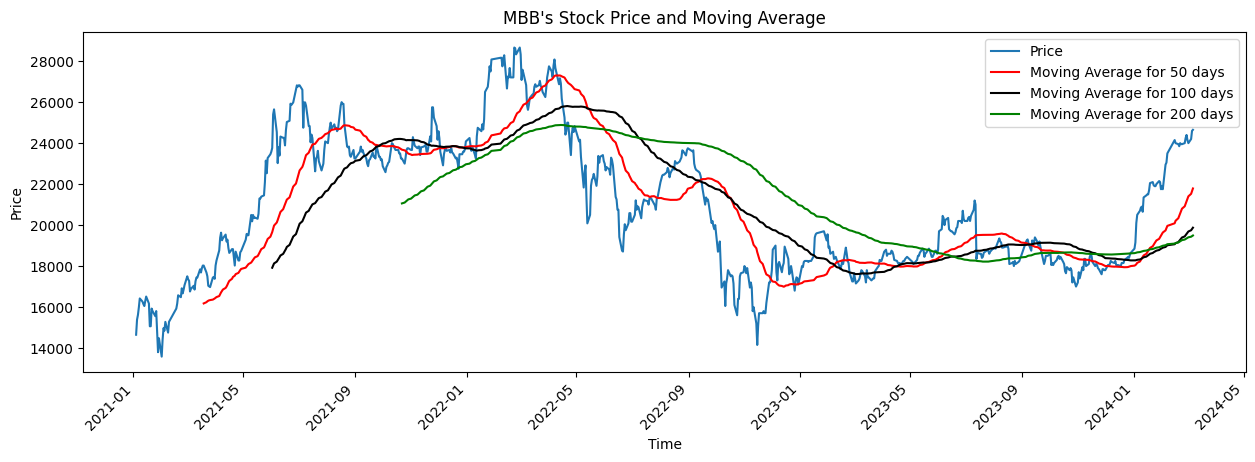

In [16]:
train_data["Price"].plot(kind = 'line')   
train_data['Moving Average for 50 days'].plot(kind = 'line', label = 'Moving Average for 50 days', color = 'red' )
train_data['Moving Average for 100 days'].plot(kind = 'line', label = 'Moving Average for 100 days', color = 'black' )
train_data['Moving Average for 200 days'].plot(kind = 'line', label = 'Moving Average for 200 days', color = 'green' )
plt.title("MBB's Stock Price and Moving Average")
plt.ylabel("Price")
plt.xlabel("Time")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Convert Price into ln(Price)

In [17]:
df['lnPrice'] = np.log(df['Price'])

In [18]:
df

Price     Open     High      Low Change %    Vol  \
Date                                                             
2021-01-04  14648.6  14312.2  14893.3  14128.8    4.13%  69.27   
2021-01-05  15382.6  14771.0  15382.6  14648.6    5.01%  55.66   
2021-01-06  15617.3  15740.7  16049.4  15432.1    1.53%  35.74   
2021-01-07  15987.7  15740.7  16018.5  15586.4    2.37%  30.65   
2021-01-08  16419.8  16172.8  16882.7  16049.4    2.70%  41.90   
...             ...      ...      ...      ...      ...    ...   
2024-04-04  23800.0  24200.0  25850.0  23800.0   -1.65%  27.79   
2024-04-05  23350.0  23850.0  25450.0  23300.0   -1.89%  25.38   
2024-04-08  23500.0  23350.0  24950.0  23150.0    0.64%  24.71   
2024-04-09  24000.0  23500.0  25100.0  23400.0    2.13%  15.73   
2024-04-10  23800.0  25650.0  25650.0  23800.0   -0.83%  21.08   

            Moving Average for 50 days  Moving Average for 100 days  \
Date                                                                  
2021-01-04                         NaN                          NaN   
2021-01-05                         NaN                          NaN   
2021-01-06                         NaN                          NaN   
2021-01-07                         NaN                          NaN   
2021-01-08                         NaN                          NaN   
...                                ...                          ...   
2024-04-04                     23662.0                      21236.5   
2024-04-05                     23688.0                      21286.5   
2024-04-08                     23716.0                      21341.5   
2024-04-09                     23757.0                      21400.5   
2024-04-10                     23795.0                      21454.0   

            Moving Average for 200 days    lnPrice  
Date                                                
2021-01-04                          NaN   9.592100  
2021-01-05                          NaN   9.640992  
2021-01-06                          NaN   9.656135  
2021-01-07                          NaN   9.679575  
2021-01-08                          NaN   9.706243  
...                                 ...        ...  
2024-04-04                    20005.239  10.077441  
2024-04-05                    20023.739  10.058352  
2024-04-08                    20041.989  10.064756  
2024-04-09                    20062.489  10.085809  
2024-04-10                    20080.489  10.077441  

[815 rows x 10 columns]

## ADF Test

In [19]:
!pip install statsmodels

In [20]:
from statsmodels.tsa.stattools import adfuller

#perform Augmented Dickey-Fuller test
adfuller(df['lnPrice'])

(-2.4939933787587565,
 0.11694264940723009,
 0,
 814,
 {'1%': -3.4384090190455994,
  '5%': -2.865097201355259,
  '10%': -2.5686641656756155},
 -3869.761804576553)

P_value = 0.133166 > 0.05 => Ln(Price) series is not stationary

## Modeling

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Shiller

The process $X_t = ln(S_t)$ satisfies the following question: 
\begin{equation}
X_t = \bar{X} + \phi(X_{t-1} - \bar{X}) + \epsilon_t
\end{equation}
where $0 < \phi < 1$ and $\epsilon_t$  ~  $NID (0, \sigma_\epsilon^2)$

or can be rewrite as follow:
\begin{equation}
\Delta X_t = \beta_0 + \beta_1 X_{t-1} + \epsilon_t
\end{equation}

In [22]:
df_Sh = df.groupby(df.index).agg({'lnPrice':'sum'})
df_Sh['lnPrice(t-1)'] = df_Sh['lnPrice'].shift(1)
df_Sh.dropna(inplace = True)

In [23]:
# Creating X values aka Xt-1
df_Sh.rename(columns = {'lnPrice(t-1)': 'X'}, inplace = True)
# Creating y values aka delta Xt
df_Sh['y'] = df_Sh['lnPrice'] - df_Sh['X']

In [24]:
df_Sh

lnPrice          X         y
Date                                      
2021-01-05   9.640992   9.592100  0.048892
2021-01-06   9.656135   9.640992  0.015142
2021-01-07   9.679575   9.656135  0.023440
2021-01-08   9.706243   9.679575  0.026668
2021-01-11   9.696795   9.706243 -0.009448
...               ...        ...       ...
2024-04-04  10.077441  10.094108 -0.016667
2024-04-05  10.058352  10.077441 -0.019089
2024-04-08  10.064756  10.058352  0.006403
2024-04-09  10.085809  10.064756  0.021053
2024-04-10  10.077441  10.085809 -0.008368

[814 rows x 3 columns]

In [25]:
from sklearn.model_selection import train_test_split
train_data_Sh, test_data_Sh = train_test_split(df_Sh, train_size = 0.97, shuffle = False)

In [26]:
train_data_Sh

lnPrice          X         y
Date                                      
2021-01-05   9.640992   9.592100  0.048892
2021-01-06   9.656135   9.640992  0.015142
2021-01-07   9.679575   9.656135  0.023440
2021-01-08   9.706243   9.679575  0.026668
2021-01-11   9.696795   9.706243 -0.009448
...               ...        ...       ...
2024-02-29  10.092040  10.102338 -0.010299
2024-03-01  10.085809  10.092040 -0.006231
2024-03-04  10.094108  10.085809  0.008299
2024-03-05  10.110502  10.094108  0.016394
2024-03-06  10.112532  10.110502  0.002030

[789 rows x 3 columns]

In [27]:
X_train_Sh, y_train_Sh, X_test_Sh, y_test_Sh = train_data_Sh['X'], train_data_Sh['y'], test_data_Sh['X'], test_data_Sh['y']
X_train_Sh, y_train_Sh, X_test_Sh, y_test_Sh = np.array(X_train_Sh), np.array(y_train_Sh), np.array(X_test_Sh), np.array(y_test_Sh)
X_train_Sh, y_train_Sh, X_test_Sh, y_test_Sh = X_train_Sh.reshape(-1, 1), y_train_Sh.reshape(-1, 1), X_test_Sh.reshape(-1, 1), y_test_Sh.reshape(-1, 1)

In [28]:
model.fit(X_train_Sh, y_train_Sh)

LinearRegression()

In [29]:
model.coef_

array([[-0.01179878]])

In [30]:
model.intercept_

array([0.11784047])

In [31]:
phi = model.coef_ + 1
X_bar = model.intercept_/(1-phi)
print('phi = ', float(phi))
print('X_bar =', float(X_bar))

phi =  0.9882012206983931
X_bar = 9.987513957888593


In [32]:
train_data_Sh.iloc[-1]['y']

0.0020304575503828914

\begin{equation}
X_t = 9.98751396 + 0.98820122(X_{t-1} - 9.98751396) + \epsilon_t
\end{equation}

#### Forecast for the next 25 days

In [33]:
forecast_Sh_25 = []
train_Sh_last_y = train_data_Sh.iloc[-1]['lnPrice']
for i in range(len(test_data_Sh)):
    train_Sh_last_y = float(X_bar) + float(phi) * (train_Sh_last_y - float(X_bar))
    forecast_Sh_25.append(train_Sh_last_y)

In [34]:
forecast_Sh_25 = pd.DataFrame(forecast_Sh_25, columns = ['Results'])   
forecast_Sh_25.set_index(test_data_Sh.index, inplace = True)

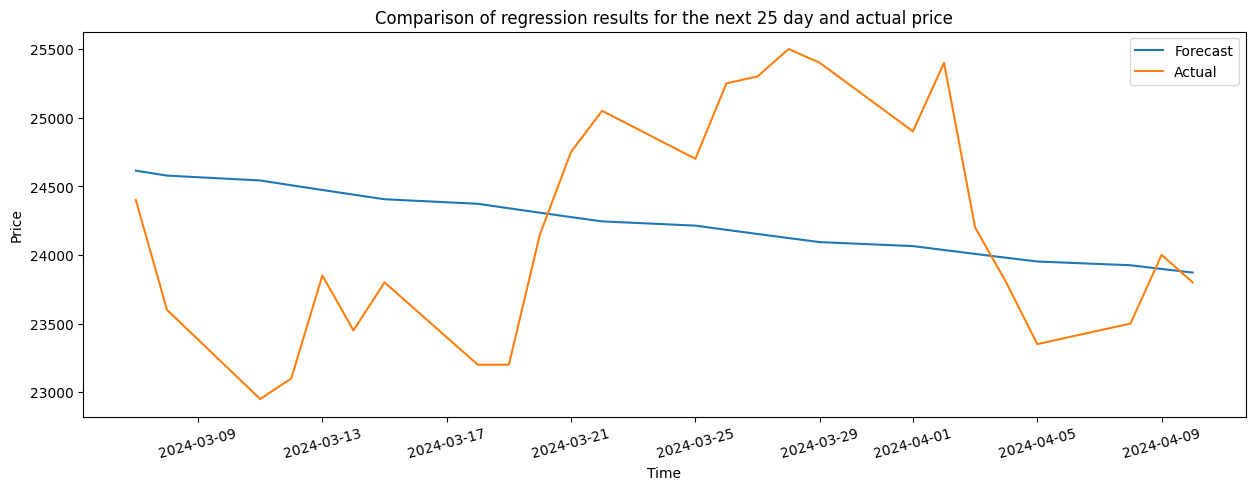

In [35]:
plt.plot(np.exp(forecast_Sh_25), label = 'Forecast')
plt.plot(np.exp(test_data_Sh['lnPrice']), label = 'Actual')
plt.title('Comparison of regression results for the next 25 day and actual price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks(rotation = 15)
plt.legend()
plt.show()

#### Forecast for the next 1 day

In [36]:
forecast_Sh_1 = model.predict(X_test_Sh)

In [37]:
forecast_Sh_1 = pd.DataFrame(forecast_Sh_1, columns = ['Delta_Xt'])
forecast_Sh_1.set_index(test_data_Sh.index, inplace = True)

In [38]:
forecast_Sh_1

Delta_Xt
Date                
2024-03-07 -0.001475
2024-03-08 -0.001355
2024-03-11 -0.000961
2024-03-12 -0.000632
2024-03-13 -0.000709
2024-03-14 -0.001086
2024-03-15 -0.000886
2024-03-18 -0.001061
2024-03-19 -0.000760
2024-03-20 -0.000760
2024-03-21 -0.001233
2024-03-22 -0.001523
2024-03-25 -0.001665
2024-03-26 -0.001499
2024-03-27 -0.001759
2024-03-28 -0.001782
2024-03-29 -0.001875
2024-04-01 -0.001829
2024-04-02 -0.001594
2024-04-03 -0.001829
2024-04-04 -0.001258
2024-04-05 -0.001061
2024-04-08 -0.000836
2024-04-09 -0.000911
2024-04-10 -0.001160

In [39]:
#Convert Delta_Xt in to Xt
forecast_Sh_1['Results'] = forecast_Sh_1['Delta_Xt'] + test_data_Sh['X']
forecast_Sh_1.drop(columns = ['Delta_Xt'], inplace = True)

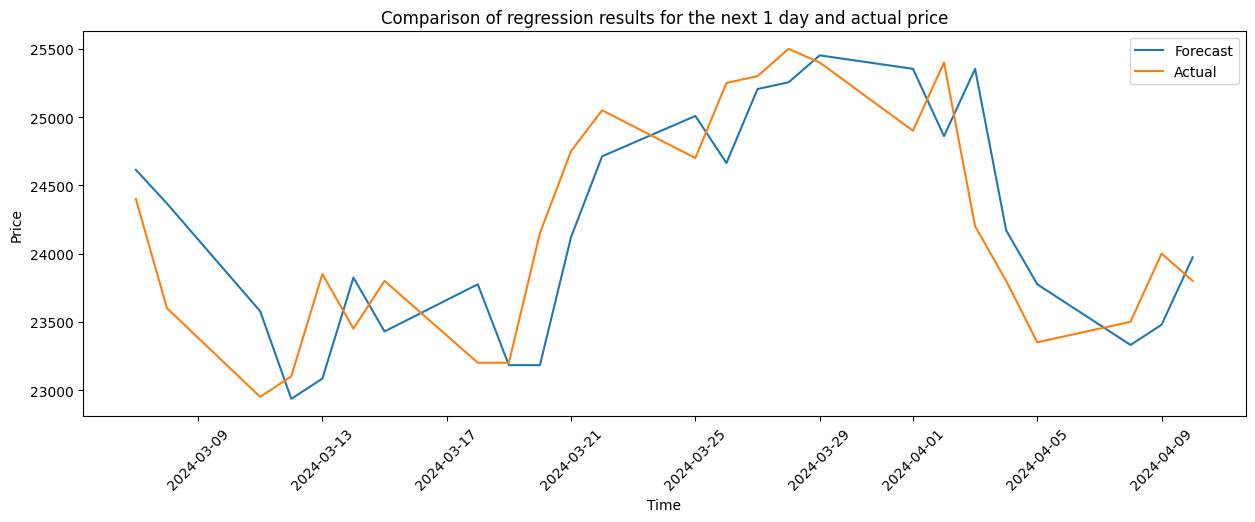

In [40]:
plt.plot(np.exp(forecast_Sh_1['Results']), label = 'Forecast')
plt.plot(np.exp(test_data_Sh['lnPrice']), label = 'Actual')
plt.title('Comparison of regression results for the next 1 day and actual price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#forecast for the next 25 days
mape_Sh_25 = mean_absolute_percentage_error(np.exp(forecast_Sh_25['Results']), np.exp(test_data_Sh['lnPrice']))
rmse_Sh_25 = mean_squared_error(np.exp(forecast_Sh_25['Results']), np.exp(test_data_Sh['lnPrice']))**0.5
r2_Sh_25 = r2_score(np.exp(forecast_Sh_25['Results'] ), np.exp(test_data_Sh['lnPrice']))

#forecast for the next 1 day
mape_Sh_1 = mean_absolute_percentage_error(np.exp(forecast_Sh_1['Results']), np.exp(test_data_Sh['lnPrice']))
rmse_Sh_1 = mean_squared_error(np.exp(forecast_Sh_1['Results']), np.exp(test_data_Sh['lnPrice']))**0.5
r2_Sh_1 = r2_score(np.exp(forecast_Sh_1['Results'] ), np.exp(test_data_Sh['lnPrice']))


#### Io-Mackinlay

The process $X_t = ln(S_t)$ satisfies the following question: 
\begin{equation}
X_t - X_{t-1} = k(X_{t-1} - X_{t-2}) + \epsilon_t
\end{equation}
where $|k| < 1$ and $\epsilon_t$ ~ $NID (0, \sigma_\epsilon^2)$

In [42]:
df_IoMac = df.groupby(df.index).agg({'lnPrice':'sum'})
df_IoMac['lnPrice(t-1)'] = df_IoMac['lnPrice'].shift(1)
df_IoMac['lnPrice(t-2)'] = df_IoMac['lnPrice'].shift(2)
df_IoMac.dropna(inplace = True)

In [43]:
df_IoMac['X'] = df_IoMac['lnPrice(t-1)'] - df_IoMac['lnPrice(t-2)']
df_IoMac['y'] = df_IoMac['lnPrice'] - df_IoMac['lnPrice(t-1)']
df_IoMac

lnPrice  lnPrice(t-1)  lnPrice(t-2)         X         y
Date                                                                 
2021-01-06   9.656135      9.640992      9.592100  0.048892  0.015142
2021-01-07   9.679575      9.656135      9.640992  0.015142  0.023440
2021-01-08   9.706243      9.679575      9.656135  0.023440  0.026668
2021-01-11   9.696795      9.706243      9.679575  0.026668 -0.009448
2021-01-12   9.689180      9.696795      9.706243 -0.009448 -0.007616
...               ...           ...           ...       ...       ...
2024-04-04  10.077441     10.094108     10.142504 -0.048397 -0.016667
2024-04-05  10.058352     10.077441     10.094108 -0.016667 -0.019089
2024-04-08  10.064756     10.058352     10.077441 -0.019089  0.006403
2024-04-09  10.085809     10.064756     10.058352  0.006403  0.021053
2024-04-10  10.077441     10.085809     10.064756  0.021053 -0.008368

[813 rows x 5 columns]

In [44]:
train_data_IM, test_data_IM = train_test_split(df_IoMac, train_size = 0.97, shuffle = False)

In [45]:
X_train_IM, y_train_IM, X_test_IM, y_test_IM = train_data_IM['X'], train_data_IM['y'], test_data_IM['X'], test_data_IM['y']
X_train_IM, y_train_IM, X_test_IM, y_test_IM = np.array(X_train_IM), np.array(y_train_IM), np.array(X_test_IM), np.array(y_test_IM)
X_train_IM, y_train_IM, X_test_IM, y_test_IM = X_train_IM.reshape(-1, 1), y_train_IM.reshape(-1, 1), X_test_IM.reshape(-1, 1), y_test_IM.reshape(-1, 1)

In [46]:
model.fit(X_train_IM, y_train_IM)

LinearRegression()

In [47]:
model.coef_

array([[-0.0017748]])

In [48]:
model.intercept_

array([0.00059957])

\begin{equation}
X_t - X_{t-1} = (-0.0017748)(X_{t-1} - X_{t-2}) + 0.00059957
\end{equation}

#### Forecast for the next 25 days

In [49]:
forecast_IM = []
train_IM_last_y = train_data_IM.iloc[-1]['y']
for i in range(len(test_data_IM)):
    train_IM_last_y = train_IM_last_y * float(model.coef_) + float(model.intercept_)
    forecast_IM.append(train_IM_last_y)

In [50]:
forecast_IM_25 = pd.DataFrame(forecast_IM, columns = ['Diff'])

In [51]:
forecast_IM_25.at[0, 'Diff'] = forecast_IM_25.at[0, 'Diff'] + df_IoMac.iloc[-1]['lnPrice']

In [52]:
forecast_IM_25 = forecast_IM_25.cumsum()

In [53]:
forecast_IM_25.set_index(test_data_IM.index, inplace = True)
forecast_IM_25.rename(columns = {'Diff': 'Results'}, inplace = True)

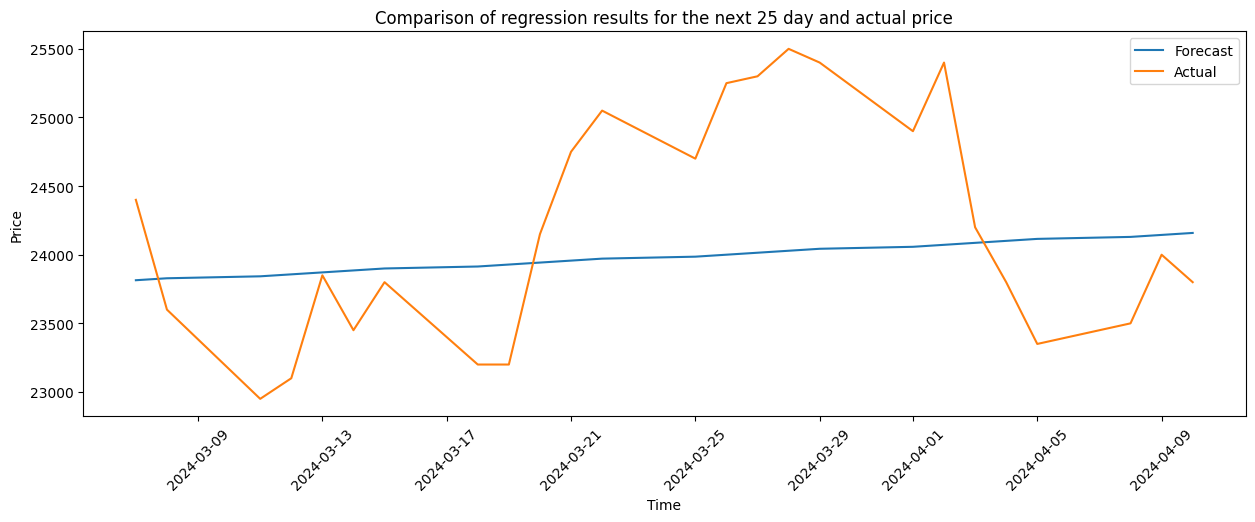

In [54]:
plt.plot(np.exp(forecast_IM_25['Results']), label = 'Forecast')
plt.plot(np.exp(test_data_IM['lnPrice']), label = 'Actual')
plt.title('Comparison of regression results for the next 25 day and actual price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

#### Forecast for the next 1 day

In [55]:
forecast_IM_1 = model.predict(X_test_IM)

In [56]:
forecast_IM_1 = pd.DataFrame(forecast_IM_1, columns = ['Results'])
forecast_IM_1.set_index(test_data_IM.index, inplace = True)

In [57]:
forecast_IM_1['Results'] = forecast_IM_1['Results'] + test_data_IM['lnPrice(t-1)']
forecast_IM_1

Results
Date                 
2024-03-07  10.113128
2024-03-08  10.102956
2024-03-11  10.069661
2024-03-12  10.041722
2024-03-13  10.048176
2024-03-14  10.080082
2024-03-15  10.063255
2024-03-18  10.078014
2024-03-19  10.052552
2024-03-20  10.052507
2024-03-21  10.092568
2024-03-22  10.117137
2024-03-25  10.129207
2024-03-26  10.115183
2024-03-27  10.137142
2024-03-28  10.139156
2024-03-29  10.147019
2024-04-01  10.143111
2024-04-02  10.123258
2024-04-03  10.143069
2024-04-04  10.094793
2024-04-05  10.078070
2024-04-08  10.058986
2024-04-09  10.065344
2024-04-10  10.086371

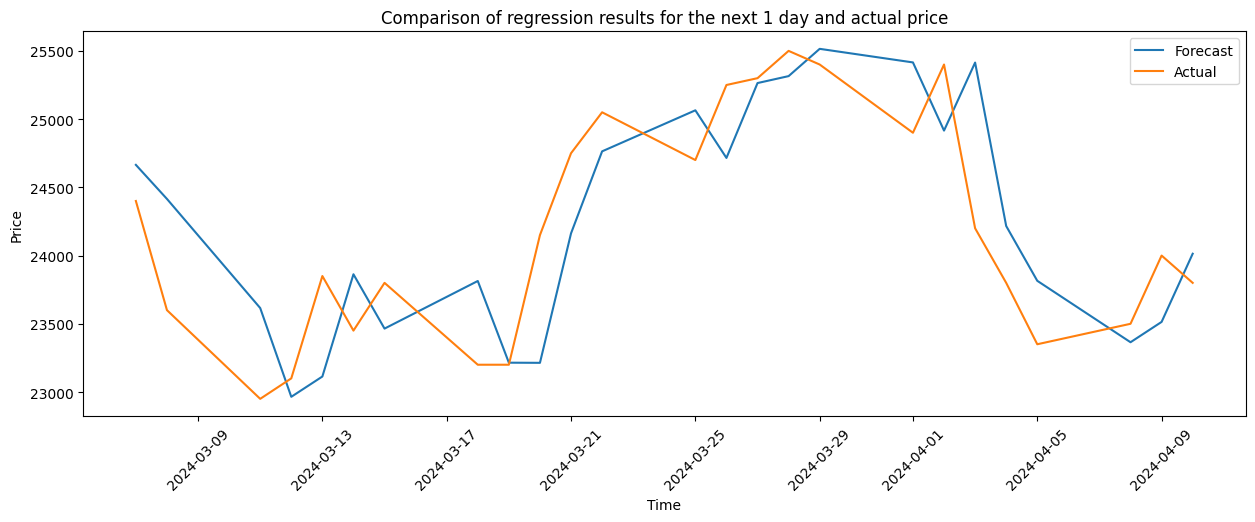

In [58]:
plt.plot(np.exp(forecast_IM_1['Results']), label = 'Forecast')
plt.plot(np.exp(test_data_IM['lnPrice']), label = 'Actual')
plt.title('Comparison of regression results for the next 1 day and actual price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

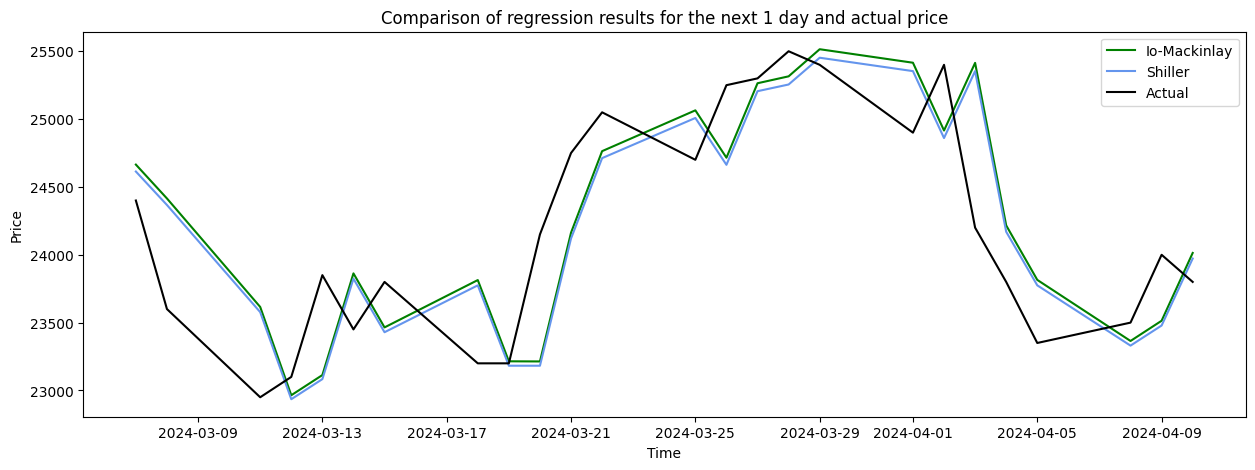

In [59]:
plt.plot(np.exp(forecast_IM_1['Results']), label = 'Io-Mackinlay', color = 'green')   #Io-Mackinlay
plt.plot(np.exp(forecast_Sh_1['Results']), label = 'Shiller', color = 'cornflowerblue')    #Shiller
plt.plot(np.exp(test_data_IM['lnPrice']), label = 'Actual', color = 'black')
plt.title('Comparison of regression results for the next 1 day and actual price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation = 0)
plt.legend()
plt.savefig('Compare.png')
plt.show()

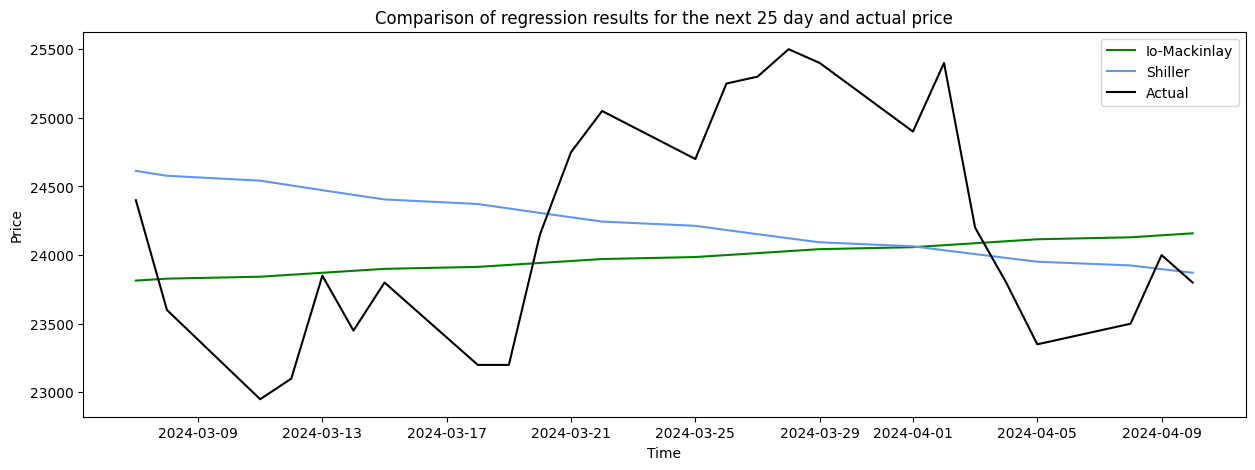

In [65]:
plt.plot(np.exp(forecast_IM_25['Results']), label = 'Io-Mackinlay', color = 'green')   #Io-Mackinlay
plt.plot(np.exp(forecast_Sh_25['Results']), label = 'Shiller', color = 'cornflowerblue')    #Shiller
plt.plot(np.exp(test_data_IM['lnPrice']), label = 'Actual', color = 'black')
plt.title('Comparison of regression results for the next 25 day and actual price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation = 0)
plt.legend()
plt.savefig('Compare_25_days.png')
plt.show()

In [61]:
mape_IM_25 = mean_absolute_percentage_error(np.exp(forecast_IM_25['Results']), np.exp(test_data_IM['lnPrice']))
rmse_IM_25 = mean_squared_error(np.exp(forecast_IM_25['Results']), np.exp(test_data_IM['lnPrice']))**0.5
r2_IM_25 = r2_score(np.exp(forecast_IM_25['Results']), np.exp(test_data_IM['lnPrice']))

mape_IM_1 = mean_absolute_percentage_error(np.exp(forecast_IM_1['Results']), np.exp(test_data_IM['lnPrice']))
rmse_IM_1 = mean_squared_error(np.exp(forecast_IM_1['Results']), np.exp(test_data_IM['lnPrice']))**0.5
r2_IM_1 = r2_score(np.exp(forecast_IM_1['Results']), np.exp(test_data_IM['lnPrice']))

## Model Performance

In [62]:
model_performance_25 = pd.DataFrame({'Metrics': ['Mape', 'Rmse', 'R2_score'], 
                                  'Shiller' : [mape_Sh_25, rmse_Sh_25, r2_Sh_25],
                                  'Io-Mackinlay' : [mape_IM_25, rmse_IM_25, r2_IM_25]})
model_performance_25

Metrics     Shiller  Io-Mackinlay
0      Mape    0.031837      0.028511
1      Rmse  901.312310    806.919122
2  R2_score  -15.352130    -59.757926

In [63]:
model_performance_1 = pd.DataFrame({'Metrics': ['Mape', 'Rmse', 'R2_score'], 
                                  'Shiller' : [mape_Sh_1, rmse_Sh_1, r2_Sh_1],
                                  'Io-Mackinlay' : [mape_IM_1, rmse_IM_1, r2_IM_1]})
model_performance_1

Metrics     Shiller  Io-Mackinlay
0      Mape    0.018066      0.018128
1      Rmse  517.035257    522.786413
2  R2_score    0.578399      0.580361